<a href="https://colab.research.google.com/github/abdipourasl/Machine-Learning-1402/blob/main/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
<h1>Machine Learning Project #4<h1>
Amin Abdipour 401133011</h1>
</div>

#  ***Without Pruning***

### 1. Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import  Data

In [35]:
dir = op.join('/content/drive/My Drive/','ML','MELBOURNE_HOUSE_PRICES_LESS.xls')  # Path to the Data folder
data = pd.read_excel(dir, sheet_name='MELBOURNE_HOUSE_PRICES_LESS')
print('data type: ', type(data))
data

data type:  <class 'pandas.core.frame.DataFrame'>


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,Vermont,16 Morack Rd,3,h,831000.0,S,Fletchers,2016-08-10,3133,Eastern Metropolitan,4181,17.2,Maroondah City Council
16379,Vermont South,28 Fortescue Gr,5,h,1658000.0,S,Ray,2016-08-10,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16380,Vermont South,2 Moran Ct,4,h,1160000.0,S,McGrath,2016-08-10,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16381,Vermont South,1 Sewart Cl,4,h,NaN,PN,Harcourts,2016-08-10,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council


### 3. Prepare Data

In [36]:
columns_to_drop = ['Suburb', 'Address', 'SellerG','Postcode','Date']
data = data.drop(columns=columns_to_drop)

In [44]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


In [45]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable
X

,Rooms,Type,Method,Regionname,Propertycount,Distance,CouncilArea
0,3,h,S,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,S,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,S,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,S,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,S,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...
16378,3,h,S,Eastern Metropolitan,4181,17.2,Maroondah City Council
16379,5,h,S,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16380,4,h,S,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16381,4,h,PN,Eastern Metropolitan,4280,17.2,Whitehorse City Council


In [46]:
y = y.fillna(y.mean())

In [47]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

### 3. Split Data

In [51]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[('cat', sklearn.preprocessing.OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

### 4. Train

In [57]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline

model = sklearn.pipeline.Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])


In [58]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Type', 'Method',
                                                   'Regionname',
                                                   'CouncilArea'])])),
                ('regressor', DecisionTreeRegressor())])

### 5. Evaluate Model

In [59]:
y_pred = model.predict(X_test)

In [60]:
# from sklearn.metrics import mean_squared_error, r2_score

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

In [63]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 166048565318.65817
R-squared: 0.4031650645081618


### 6. Visualize Decision Tree

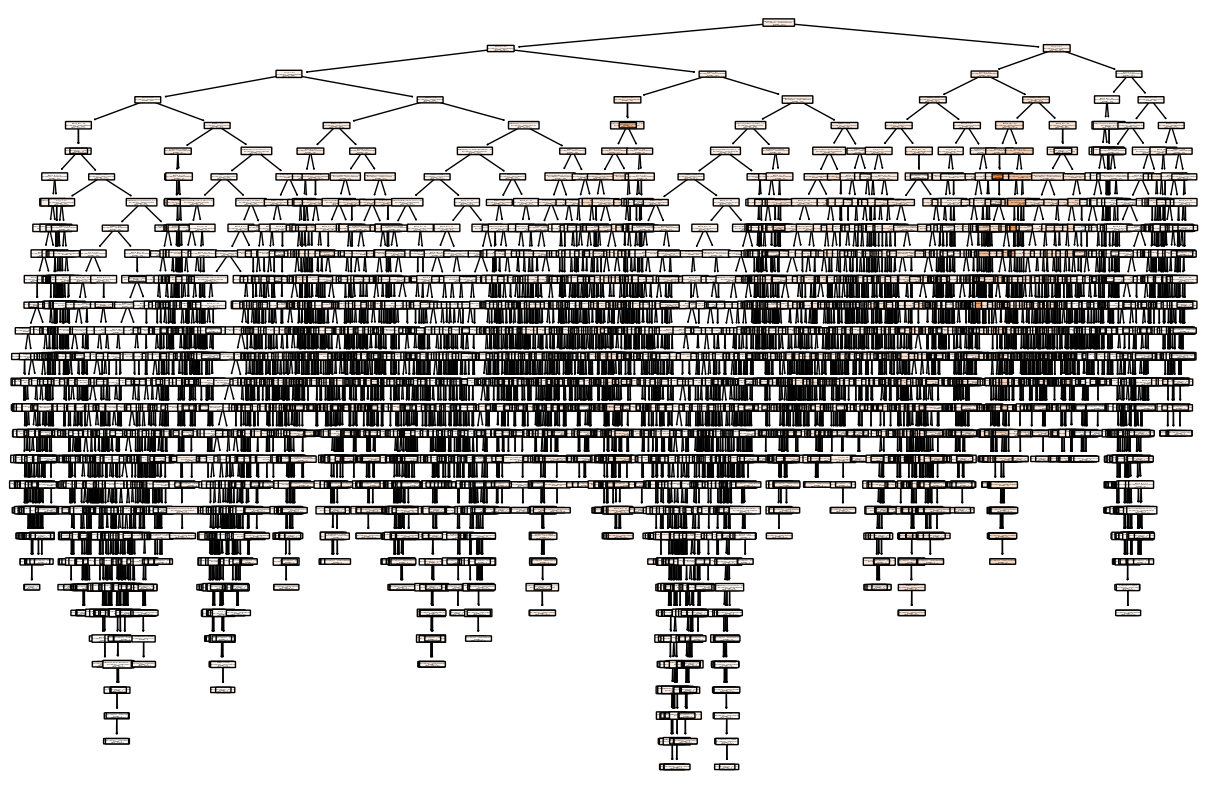

In [64]:
# from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
# Extract the decision tree from the pipeline
tree = model.named_steps['regressor']

# Extract feature names after one-hot encoding
categorical_feature_names_out = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = list(categorical_feature_names_out) + list(X.columns.difference(categorical_columns))

plot_tree(tree, feature_names=all_feature_names, filled=True, rounded=True)
plt.show()

#  ***With Pruning alpha = 0.01***

### 1. Importing Libraries

In [80]:
import numpy as np
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import  Data

In [81]:
dir = op.join('/content/drive/My Drive/','ML','MELBOURNE_HOUSE_PRICES_LESS.xls')  # Path to the Data folder
data = pd.read_excel(dir, sheet_name='MELBOURNE_HOUSE_PRICES_LESS')
print('data type: ', type(data))
data

data type:  <class 'pandas.core.frame.DataFrame'>


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,Vermont,16 Morack Rd,3,h,831000.0,S,Fletchers,2016-08-10,3133,Eastern Metropolitan,4181,17.2,Maroondah City Council
16379,Vermont South,28 Fortescue Gr,5,h,1658000.0,S,Ray,2016-08-10,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16380,Vermont South,2 Moran Ct,4,h,1160000.0,S,McGrath,2016-08-10,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16381,Vermont South,1 Sewart Cl,4,h,NaN,PN,Harcourts,2016-08-10,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council


### 3. Prepare Data

In [82]:
columns_to_drop = ['Suburb', 'Address', 'SellerG','Postcode','Date']
data = data.drop(columns=columns_to_drop)

In [83]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


In [84]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable
X

,Rooms,Type,Method,Regionname,Propertycount,Distance,CouncilArea
0,3,h,S,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,S,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,S,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,S,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,S,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...
16378,3,h,S,Eastern Metropolitan,4181,17.2,Maroondah City Council
16379,5,h,S,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16380,4,h,S,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16381,4,h,PN,Eastern Metropolitan,4280,17.2,Whitehorse City Council


In [85]:
y = y.fillna(y.mean())

In [86]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

### 3. Split Data

In [87]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[('cat', sklearn.preprocessing.OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

### 4. Train

In [89]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(ccp_alpha=0.01))  # Adjust ccp_alpha as needed
])


Train the model


In [90]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Type', 'Method',
                                                   'Regionname',
                                                   'CouncilArea'])])),
                ('regressor', DecisionTreeRegressor(ccp_alpha=0.01))])

### 5. Evaluate Model

In [91]:
y_pred = model.predict(X_test)

In [92]:
# from sklearn.metrics import mean_squared_error, r2_score

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

In [93]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 166444314779.43878
R-squared: 0.4017426065456817


### 6. Visualize Decision Tree

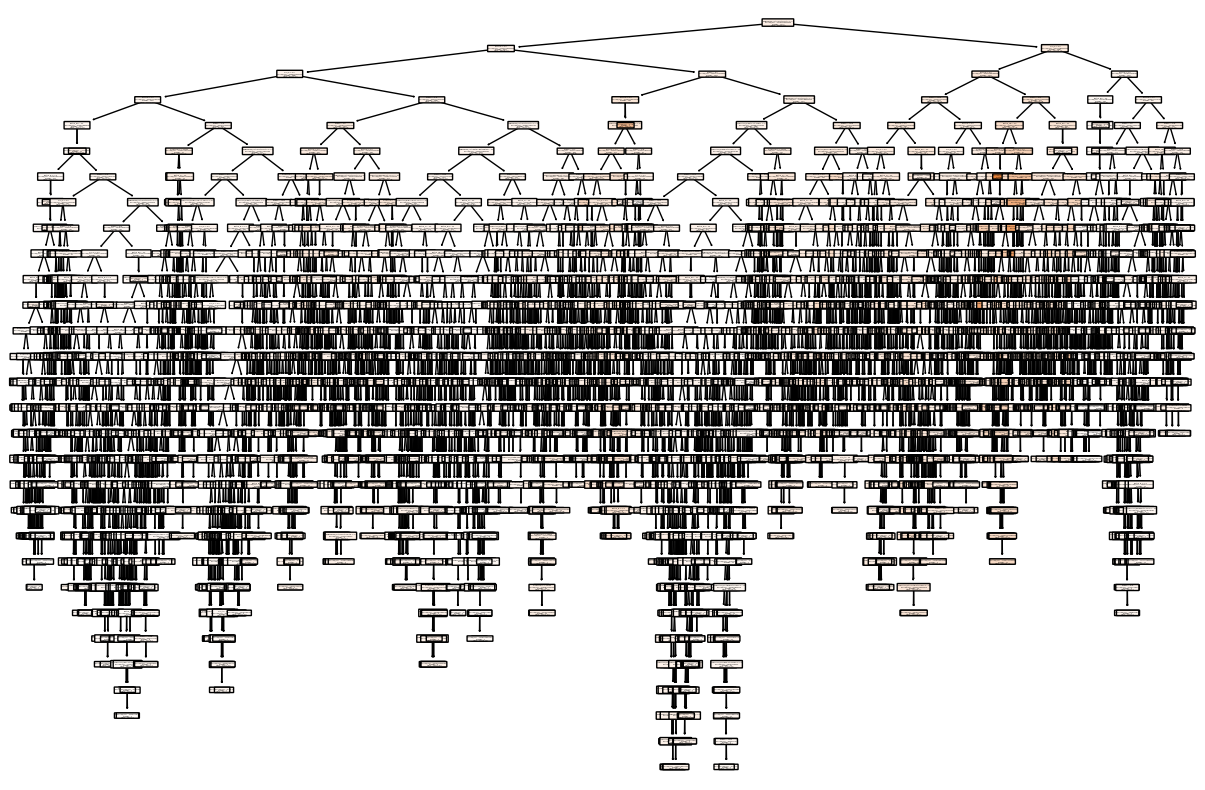

In [94]:
# from sklearn.tree import plot_tree

# Visualize Pruned Decision Tree
plt.figure(figsize=(15, 10))
# Extract the decision tree from the pipeline
tree = model.named_steps['regressor']

# Extract feature names after one-hot encoding
categorical_feature_names_out = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = list(categorical_feature_names_out) + list(X.columns.difference(categorical_columns))

plot_tree(tree, feature_names=all_feature_names, filled=True, rounded=True)
plt.show()

#  ***With Pruning alpha = 0.1***

### 1. Importing Libraries

In [95]:
import numpy as np
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Import  Data

In [96]:
dir = op.join('/content/drive/My Drive/','ML','MELBOURNE_HOUSE_PRICES_LESS.xls')  # Path to the Data folder
data = pd.read_excel(dir, sheet_name='MELBOURNE_HOUSE_PRICES_LESS')
print('data type: ', type(data))
data

data type:  <class 'pandas.core.frame.DataFrame'>


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,Vermont,16 Morack Rd,3,h,831000.0,S,Fletchers,2016-08-10,3133,Eastern Metropolitan,4181,17.2,Maroondah City Council
16379,Vermont South,28 Fortescue Gr,5,h,1658000.0,S,Ray,2016-08-10,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16380,Vermont South,2 Moran Ct,4,h,1160000.0,S,McGrath,2016-08-10,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16381,Vermont South,1 Sewart Cl,4,h,NaN,PN,Harcourts,2016-08-10,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council


### 3. Prepare Data

In [97]:
columns_to_drop = ['Suburb', 'Address', 'SellerG','Postcode','Date']
data = data.drop(columns=columns_to_drop)

In [98]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


In [99]:
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable
X

,Rooms,Type,Method,Regionname,Propertycount,Distance,CouncilArea
0,3,h,S,Northern Metropolitan,4019,3.0,Yarra City Council
1,3,h,S,Northern Metropolitan,4019,3.0,Yarra City Council
2,3,h,S,Northern Metropolitan,4019,3.0,Yarra City Council
3,3,h,S,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,2,h,S,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...
16378,3,h,S,Eastern Metropolitan,4181,17.2,Maroondah City Council
16379,5,h,S,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16380,4,h,S,Eastern Metropolitan,4280,17.2,Whitehorse City Council
16381,4,h,PN,Eastern Metropolitan,4280,17.2,Whitehorse City Council


In [100]:
y = y.fillna(y.mean())

In [101]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

### 3. Split Data

In [102]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[('cat', sklearn.preprocessing.OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

### 4. Train

In [104]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(ccp_alpha=0.01))  # Adjust ccp_alpha as needed
])


Train the model


In [105]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Type', 'Method',
                                                   'Regionname',
                                                   'CouncilArea'])])),
                ('regressor', DecisionTreeRegressor(ccp_alpha=0.01))])

### 5. Evaluate Model

In [106]:
y_pred = model.predict(X_test)

In [107]:
# from sklearn.metrics import mean_squared_error, r2_score

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

In [108]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 165691177875.727
R-squared: 0.4044496363503701


### 6. Visualize Decision Tree

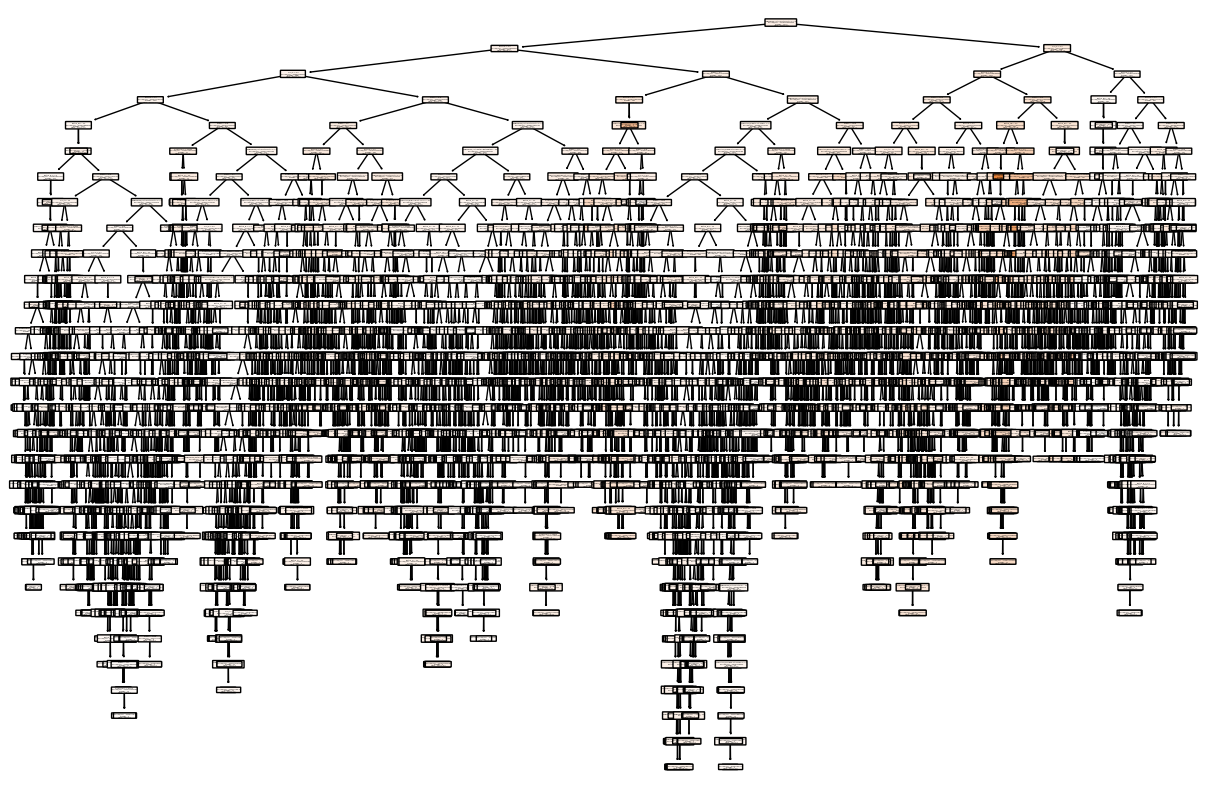

In [109]:
# from sklearn.tree import plot_tree

# Visualize Pruned Decision Tree
plt.figure(figsize=(15, 10))
# Extract the decision tree from the pipeline
tree = model.named_steps['regressor']

# Extract feature names after one-hot encoding
categorical_feature_names_out = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = list(categorical_feature_names_out) + list(X.columns.difference(categorical_columns))

plot_tree(tree, feature_names=all_feature_names, filled=True, rounded=True)
plt.show()